In [3]:
# system
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# fastAI
from fastai.vision.all import *
from fastai.callback.tracker import Recorder
from fastai.interpret import ClassificationInterpretation
from utils.dataloader import generator_setup_eval, create_test_conf
import matplotlib.pyplot as plt

from pathlib import Path

# If using the current directory
current_dir = Path.cwd()

project_root = current_dir.parent.parent.parent

In [6]:
relative_path = project_root / 'dataset' / 'rotation' / 'test'

model_to_load = relative_path / 'vit-3.pkl'


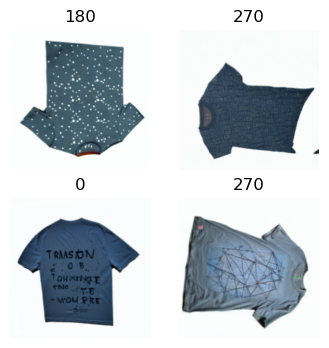

In [7]:
props = {
    'min_zoom': 1,
    'max_zoom': 1,
    'max_rotate': 0,
}

dls = generator_setup_eval(path=relative_path, min_zoom=props['min_zoom'], max_zoom=props['max_zoom'], batch_size=32)
dls.show_batch(max_n=4, figsize=(4, 4))

In [8]:
%%capture

class_names = ["0", "90", "180","270"]

overall_cm = create_test_conf(model_to_load=model_to_load, dls=dls, class_names=class_names, save_plot=True, props=props)

In [ ]:
# Load an image
img_path = relative_path / str(0) / 'tshirt_20230920133451.png'

img = Image.open(img_path)
img = img.rotate(-275)
# If you used any specific item transforms during training, apply them here
img = img.resize((224, 224))  # Example resize, adjust according to your training setup

plt.imshow(img)

# Make a prediction
pred, pred_idx, probs = learn.predict(img)

print(f"Prediction: {pred}")
print(f"Prediction Index: {pred_idx}")

In [ ]:
# from PIL import Image
# import os

# def rotate_images_in_folder(folder_path, rotation_angle):
#     # Ensure the folder exists
#     if not os.path.isdir(folder_path):
#         raise NotADirectoryError(f"The path {folder_path} is not a directory.")
    
#     # Iterate through all files in the folder
#     for filename in os.listdir(folder_path):
#         # Construct the full file path
#         file_path = os.path.join(folder_path, filename)
        
#         # Check if the file is an image (you can add more extensions if needed)
#         if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
#             # Open the image file
#             with Image.open(file_path) as img:
#                 # Rotate the image
#                 rotated_img = img.rotate(rotation_angle, expand=True)
                
#                 # Save the rotated image back to the same path
#                 rotated_img.save(file_path)
#                 #print(f"Rotated and saved: {filename}")

# # Example usage:
# print(relative_path)
# folder_path = relative_path / '270'
# print(folder_path)
# rotation_angle = 90  # Replace with the desired rotation angle
# rotate_images_in_folder(folder_path, rotation_angle)